# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q=' 


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    #city_url = f"{url}appid={weather_api_key}&q=" + city
    #url + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | saipan
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | nelson bay
Processing Record 6 of Set 1 | mareeba
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | utrik
Processing Record 9 of Set 1 | thohoyandou
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | callao
Processing Record 13 of Set 1 | jinchang
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | carolina beach
Processing Record 18 of Set 1 | mont-dore
Processing Record 19 of Set 1 | codrington
Processing Record 20 of Set 1 | ribeira brava
Processing Record 21 of Set 1 | madalena
Processing Record 22 of Set 1 | puerto san carl

Processing Record 39 of Set 4 | khovd
Processing Record 40 of Set 4 | cutral-co
Processing Record 41 of Set 4 | margate
Processing Record 42 of Set 4 | havre
Processing Record 43 of Set 4 | labuan
Processing Record 44 of Set 4 | whitehorse
Processing Record 45 of Set 4 | lucapa
Processing Record 46 of Set 4 | pemangkat
Processing Record 47 of Set 4 | quellon
Processing Record 48 of Set 4 | nyaunglebin
Processing Record 49 of Set 4 | guerrero negro
Processing Record 0 of Set 5 | ilulissat
Processing Record 1 of Set 5 | hadibu
Processing Record 2 of Set 5 | west bay
Processing Record 3 of Set 5 | holualoa
Processing Record 4 of Set 5 | kiomboi
Processing Record 5 of Set 5 | esenyurt
Processing Record 6 of Set 5 | bubaque
Processing Record 7 of Set 5 | cole harbour
Processing Record 8 of Set 5 | boda
Processing Record 9 of Set 5 | howrah
Processing Record 10 of Set 5 | sirte
Processing Record 11 of Set 5 | hani i elezit
City not found. Skipping...
Processing Record 12 of Set 5 | albany
Pr

Processing Record 30 of Set 8 | nikol'sk
Processing Record 31 of Set 8 | weno
Processing Record 32 of Set 8 | dolores
Processing Record 33 of Set 8 | crane
Processing Record 34 of Set 8 | mega
Processing Record 35 of Set 8 | borzya
Processing Record 36 of Set 8 | brezina
Processing Record 37 of Set 8 | boromo
Processing Record 38 of Set 8 | ilebo
Processing Record 39 of Set 8 | vanino
Processing Record 40 of Set 8 | necochea
Processing Record 41 of Set 8 | preobrazheniye
Processing Record 42 of Set 8 | tobi village
City not found. Skipping...
Processing Record 43 of Set 8 | nadym
Processing Record 44 of Set 8 | vilyuysk
Processing Record 45 of Set 8 | broken hill
Processing Record 46 of Set 8 | kananga
Processing Record 47 of Set 8 | tyukhtet
Processing Record 48 of Set 8 | acarau
Processing Record 49 of Set 8 | mukah
City not found. Skipping...
Processing Record 0 of Set 9 | pangody
Processing Record 1 of Set 9 | winnipeg
Processing Record 2 of Set 9 | dunedin
Processing Record 3 of S

Processing Record 18 of Set 12 | villa regina
Processing Record 19 of Set 12 | mildura
Processing Record 20 of Set 12 | fougamou
Processing Record 21 of Set 12 | okhotsk
Processing Record 22 of Set 12 | carutapera
Processing Record 23 of Set 12 | castillos
Processing Record 24 of Set 12 | hayma'
City not found. Skipping...
Processing Record 25 of Set 12 | xining
Processing Record 26 of Set 12 | vuktyl
Processing Record 27 of Set 12 | howard springs
Processing Record 28 of Set 12 | aldan
Processing Record 29 of Set 12 | naze
Processing Record 30 of Set 12 | nagqu
Processing Record 31 of Set 12 | harburg
Processing Record 32 of Set 12 | asau
Processing Record 33 of Set 12 | cedeira
Processing Record 34 of Set 12 | san luis de la loma
Processing Record 35 of Set 12 | lashkar gah
Processing Record 36 of Set 12 | sinabang
Processing Record 37 of Set 12 | cruzeiro do sul
Processing Record 38 of Set 12 | guelmim
Processing Record 39 of Set 12 | qaisumah
Processing Record 40 of Set 12 | belyye

In [5]:
city_url = url + city
print(city_url)

http://api.openweathermap.org/data/2.5/weather?appid=80b85f9e2aa810a68979a88c87c96b8e&units=imperial&q=xingtai


In [6]:
response = requests.get(city_url).json()
print(json.dumps(response,indent=4,sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 37.0631,
        "lon": 114.4942
    },
    "dt": 1709170331,
    "id": 1788927,
    "main": {
        "feels_like": 30.7,
        "grnd_level": 1026,
        "humidity": 52,
        "pressure": 1035,
        "sea_level": 1035,
        "temp": 38.62,
        "temp_max": 38.62,
        "temp_min": 38.62
    },
    "name": "Xingtai",
    "sys": {
        "country": "CN",
        "sunrise": 1709160878,
        "sunset": 1709201690
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 26,
        "gust": 16.2,
        "speed": 13.11
    }
}


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,46.87,88,96,5.86,CL,1709170108
1,saipan,15.1355,145.7010,84.90,54,0,19.57,MP,1709170109
2,invercargill,-46.4000,168.3500,67.01,72,39,3.00,NZ,1709169811
3,port-aux-francais,-49.3500,70.2167,48.04,97,100,31.72,TF,1709170109
4,nelson bay,-32.7167,152.1500,94.08,69,19,8.01,AU,1709170109


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,46.87,88,96,5.86,CL,1709170108
1,saipan,15.1355,145.7010,84.90,54,0,19.57,MP,1709170109
2,invercargill,-46.4000,168.3500,67.01,72,39,3.00,NZ,1709169811
3,port-aux-francais,-49.3500,70.2167,48.04,97,100,31.72,TF,1709170109
4,nelson bay,-32.7167,152.1500,94.08,69,19,8.01,AU,1709170109


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

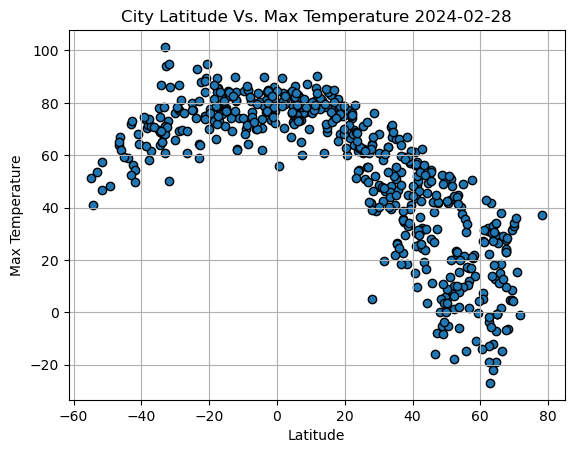

In [12]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(lat,temp, edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude Vs. Max Temperature ' + time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

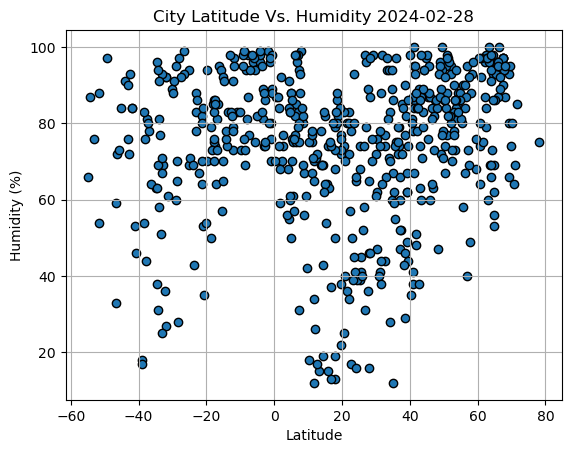

In [13]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df['Lat']
hum = city_data_df['Humidity']
plt.scatter(lat,hum, edgecolors='black')
# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude Vs. Humidity ' + time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

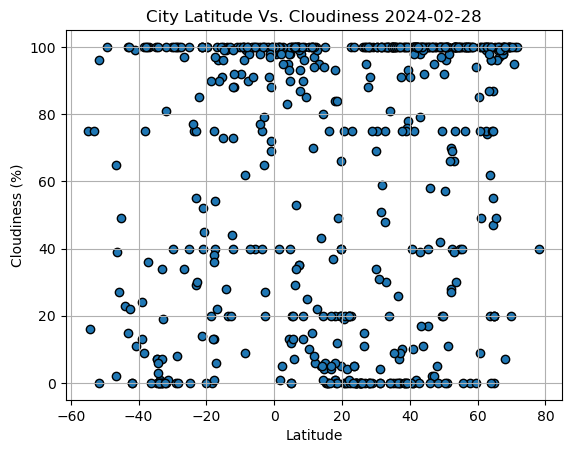

In [15]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']
cloud = city_data_df['Cloudiness']
plt.scatter(lat,cloud, edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude Vs. Cloudiness ' + time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

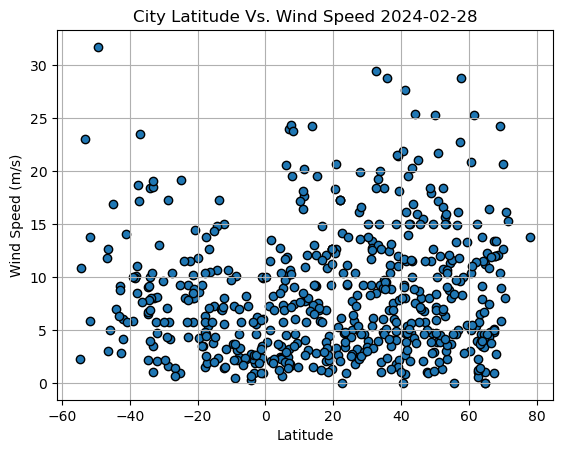

In [17]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']
cloud = city_data_df['Wind Speed']
plt.scatter(lat,cloud, edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude Vs. Wind Speed ' + time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values, title, text_coordinates):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, edgecolors='black')
    plt.annotate(line_eq,text_coordinates,fontsize=20, color='red')
    plt.plot(x_values, regress_values, 'r-')
    # Incorporate the other graph properties
    plt.grid()
    plt.ylabel(title)
    plt.xlabel('Latitude')
 
    print(f'r-value is {rvalue**2}')
    # Show plot
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saipan,15.1355,145.7010,84.90,54,0,19.57,MP,1709170109
6,anadyr,64.7500,177.4833,-7.01,69,0,11.18,RU,1709170110
7,utrik,11.2278,169.8474,79.70,75,100,16.42,MH,1709170110
9,longyearbyen,78.2186,15.6401,37.24,75,40,13.80,SJ,1709170111
10,bilibino,68.0546,166.4372,-6.59,87,7,2.75,RU,1709170111


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,46.87,88,96,5.86,CL,1709170108
2,invercargill,-46.4000,168.3500,67.01,72,39,3.00,NZ,1709169811
3,port-aux-francais,-49.3500,70.2167,48.04,97,100,31.72,TF,1709170109
4,nelson bay,-32.7167,152.1500,94.08,69,19,8.01,AU,1709170109
5,mareeba,-17.0000,145.4333,83.44,81,100,5.35,AU,1709170110


###  Temperature vs. Latitude Linear Regression Plot

r-value is 0.7050359096760981


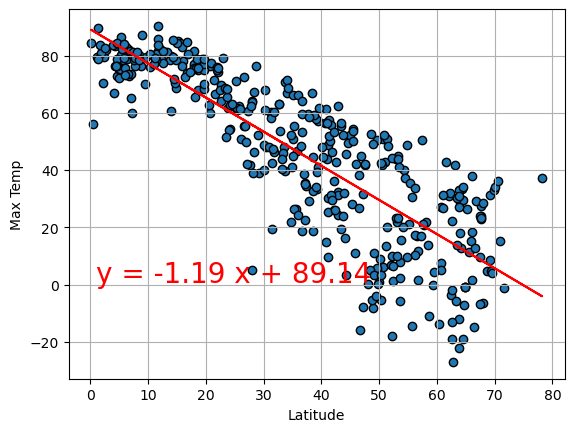

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values,y_values, 'Max Temp', (1,1))

r-value is 0.28114177277957086


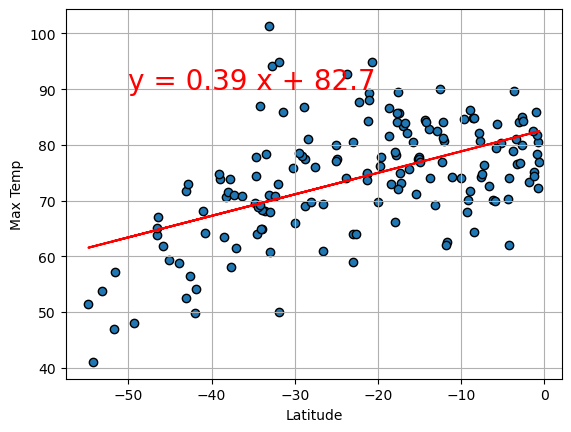

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values,y_values, 'Max Temp', (-50,90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r-value is 0.11552418982321393


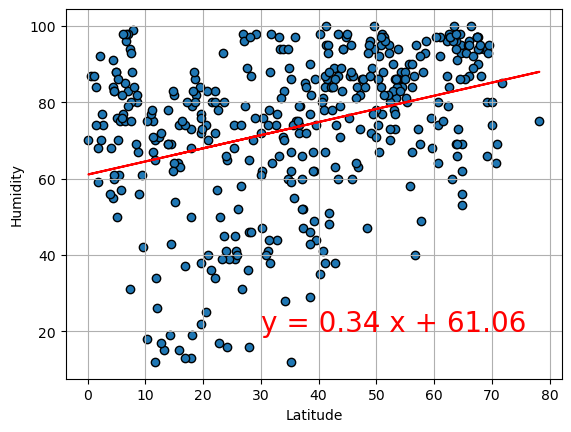

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values,y_values, 'Humidity', (30,20))

r-value is 0.13204617663330503


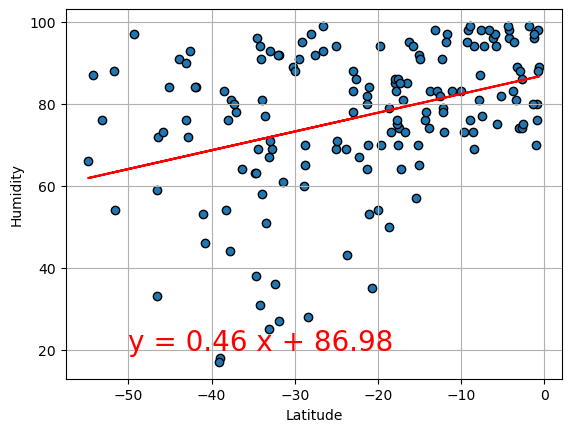

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values,y_values, 'Humidity', (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r-value is 0.05787518603232656


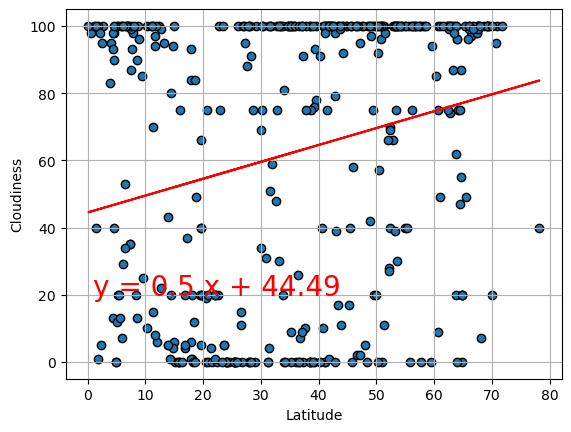

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values,y_values, 'Cloudiness', (1,20))

r-value is 0.15109865015741528


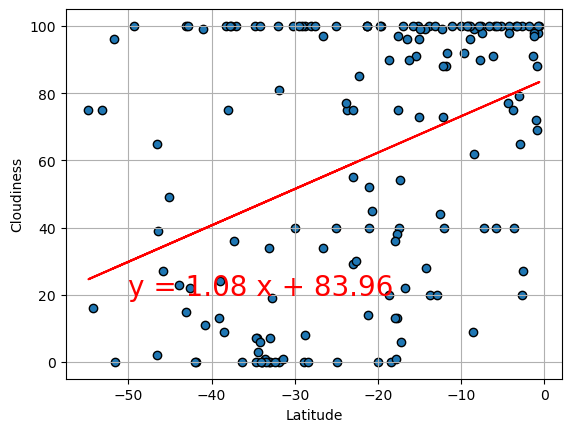

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values,y_values, 'Cloudiness', (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r-value is 0.003993618722858335


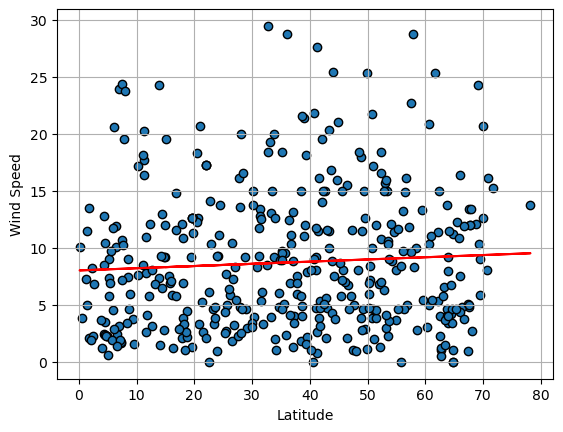

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values,y_values, 'Wind Speed', (1,35))

r-value is 0.1650979968502527


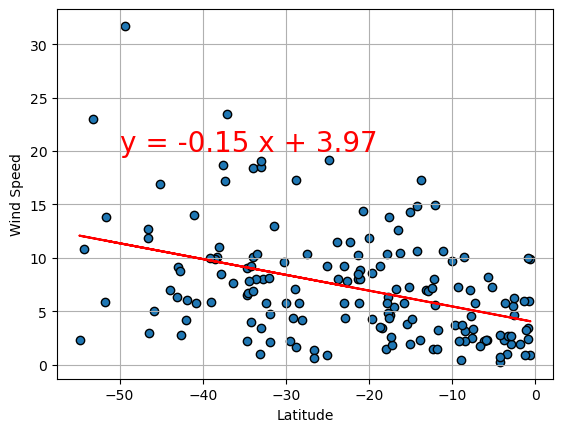

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values,y_values, 'Wind Speed', (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE